<h1> Importing The Necessary Modules </h1>

In [24]:
import tweepy as twt
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [38]:
logDets = pd.read_csv('Login.csv')
# print(logDets)

In [26]:
# The Twitter API credentials
consumerKey = logDets['key'][0]
consumerSecret = logDets['key'][1]
accessToken = logDets['key'][2]
accessTokenSecret = logDets['key'][3]


In [39]:
# Auth Object
authenticate = twt.OAuthHandler(consumerKey, consumerSecret)

# Set access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create API object
api = twt.API(authenticate, wait_on_rate_limit=True)

In [42]:
# Extract 100 tweets from Twitter user
posts = api.user_timeline(id = '@owusu2kelvin', count=100, lang = 'en', tweet_mode = 'extended')

# Show tweets
print("Show tweets" + '\n')
n = 1
for tweet in posts[0:5]:
    print(str(n) + ') '+tweet.full_text + "\n")
    n=n+1

Show tweets

1) RT @ESPNUK: College football is wild 🤘

(via @accnetwork) 
https://t.co/8h9TjkxVAT

2) RT @CNN: China's first Universal Studios theme park opens this month in Beijing. Here's a sneak peek: https://t.co/C5lm315DTI https://t.co/…

3) RT @overtime: KAWHI in the Way 2 Sexy music video 🤣 @kawhileonard (via @Drake) https://t.co/mgpf7PLeyU

4) RT @BleacherReport: Kawhi’s really in Drake’s music video 🤣 https://t.co/4MH93mHWnn

5) RT @VancityReynolds: Life doesn't always imitate art, but I'd wear a tux and do karate with @TheRock and @GalGadot everyday if I could. #Re…



In [43]:
# Create dataframe with column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

df.head()

,Tweets
0,RT @ESPNUK: College football is wild 🤘\n\n(via...
1,RT @CNN: China's first Universal Studios theme...
2,RT @overtime: KAWHI in the Way 2 Sexy music vi...
3,RT @BleacherReport: Kawhi’s really in Drake’s ...
4,RT @VancityReynolds: Life doesn't always imita...


In [44]:
# Cleaning the text using a function
def cleanTxt(text):
    text =re.sub(r'@[A-Za-z0-9_]+', '', text) # Removing @mentions
    text = re.sub(r'#', '', text) # Removing Hashtags
    text = re.sub(r'RT[\s]+:', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # Removing hyperlinks

    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt) # Cleaning the texts

df.head() # Showing the cleaned texts

,Tweets
0,College football is wild 🤘\n\n(via ) \n
1,China's first Universal Studios theme park op...
2,KAWHI in the Way 2 Sexy music video 🤣 (via )
3,Kawhi’s really in Drake’s music video 🤣
4,"Life doesn't always imitate art, but I'd wear..."


In [45]:
# A function to get the subjectivity
def getSubject(text):
    return TextBlob(text).sentiment.subjectivity

# A funtion to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Adding two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubject)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [46]:
df

,Tweets,Subjectivity,Polarity
0,College football is wild 🤘\n\n(via ) \n,0.400000,0.100000
1,China's first Universal Studios theme park op...,0.166667,0.125000
2,KAWHI in the Way 2 Sexy music video 🤣 (via ),1.000000,0.500000
3,Kawhi’s really in Drake’s music video 🤣,0.200000,0.200000
4,"Life doesn't always imitate art, but I'd wear...",0.600000,-0.200000
...,...,...,...
94,Kepa Arrizabalaga was subbed in for penalties...,0.666667,0.333333
95,An inspired substitution! 🔵🏆\n\n✅ Shoot-out h...,0.000000,0.000000
96,Super Chelsea ✅ \nSuper Cup ✅\n\nUP THE CHELS...,0.666667,0.375000
97,SCENES 🙌\n\nSuperCup,0.000000,0.000000


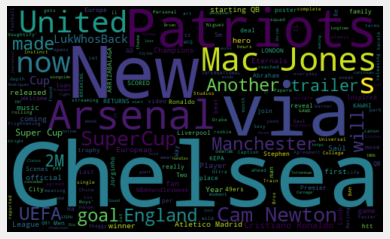

In [47]:
# Plotting a WordCloud for visualizing most used words
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
# Create function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)


df.head(20)

,Tweets,Subjectivity,Polarity,Analysis
0,College football is wild 🤘\n\n(via ) \n,0.400000,0.100000,Positive
1,China's first Universal Studios theme park op...,0.166667,0.125000,Positive
2,KAWHI in the Way 2 Sexy music video 🤣 (via ),1.000000,0.500000,Positive
3,Kawhi’s really in Drake’s music video 🤣,0.200000,0.200000,Positive
4,"Life doesn't always imitate art, but I'd wear...",0.600000,-0.200000,Negative
5,Caption this!\n\n🇵🇹 Cristiano Ronaldo ⚽️⚽️\n\...,0.000000,0.000000,Neutral
6,🚨 CRISTIANO RONALDO HAS NOW SCORED THE MOST I...,0.250000,0.250000,Positive
7,😳😳😳,0.000000,0.000000,Neutral
8,A-Train gets his own single 'Faster' ahead of...,0.607143,0.264286,Positive
9,Chelsea's squad depth is frightening 😳,1.000000,-0.500000,Negative


In [49]:
# Count of Negative, Neutral and Positive analysis
df['Analysis'].value_counts()

Neutral     59
Positive    35
Negative     5
Name: Analysis, dtype: int64

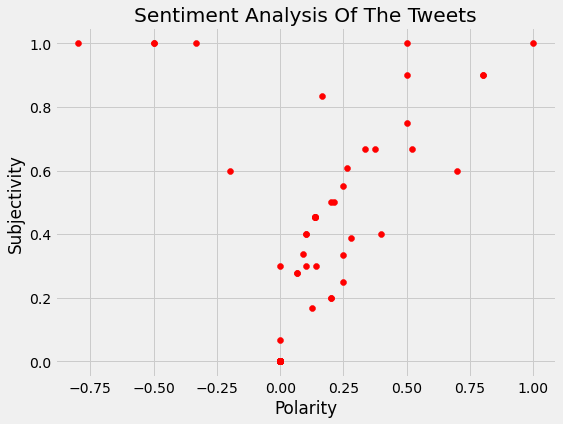

In [50]:
# Plotting the ploarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(len(df)):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')
    
plt.title('Sentiment Analysis Of The Tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()